In [55]:
# Importing the necessary libraries for data cleaning, data preprocessing, data visualization
import numpy as np  # linear algebra
import pandas as pd  # to load files and perform tasks
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # data visualization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [56]:
train = pd.read_csv('/content/counterfeit_train.csv')
test = pd.read_csv('/content/counterfeit_test.csv')

In [57]:
name = train['Medicine_ID']
name
test_name = test['Medicine_ID']
test_name

0       HLZ81
1       ECE94
2       SAD14
3       EQV63
4       AIR10
        ...  
1700    KXW10
1701    CKE54
1702    HAY13
1703    ZEE32
1704    NDL93
Name: Medicine_ID, Length: 1705, dtype: object

In [3]:
train.head()  #diplaying the first five rows of dataset

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [4]:
test.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small


As we can see that the Test Data do not have Counterfeit Sales column, we have to build a predictive model for it.

###Looking at the basic information of the data.

##Exploratory Data Analysis

*The approach is to inspect each categorical variable and look for direct correlations with the sales distribution as well as between themself.*

In [3]:
print("No. of rows in the dataset:",train.shape[0])
print("No. of columns in the dataset:",train.shape[1])

No. of rows in the dataset: 6818
No. of columns in the dataset: 12


In [4]:
# Scanning the dataset for missing values.

train.isnull().sum()

Medicine_ID               0
Counterfeit_Weight     1166
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
dtype: int64

Training dataset contains 1166 null values in 'Counterfeit_Weight' .



In [5]:
# Looking at some overall information and statistics about the data.

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   5652 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


This shows the name of all the columns, and which columns have null values. The data types used are: int, float and object. It also tells us about the no. of columns of each data type.

In [34]:
obj_dtype = [i for i in train if train[i].dtypes == 'O']
num_dtype = [i for i in train if (train[i].dtypes != 'O' and i != 'Counterfeit_Sales')]

In [9]:
# Provide a summary of the numerical information...

train.describe(percentiles = [.25,.5,.75,.9,.95,.99])

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
count,5652.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,14.115057,1995.836316,151.401518,0.079174,2280.583480
std,4.649668,8.368979,62.203961,0.051481,1693.354404
min,5.855000,1983.000000,41.790000,0.013000,146.290000
25%,9.995000,1985.000000,104.509400,0.040058,933.265600
50%,13.800000,1997.000000,153.195700,0.066955,1902.670400
75%,18.050000,2002.000000,196.148350,0.107697,3207.638400
90%,20.650000,2007.000000,241.641040,0.152711,4643.902160
95%,21.550000,2007.000000,260.740800,0.176885,5582.547000
99%,22.150000,2007.000000,273.311856,0.238329,7350.518978


This shows how the data is distributed for the numerical columns.

##*Data Visualisation* for Analysis

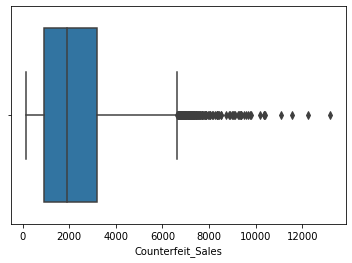

In [10]:
sns.boxplot(train['Counterfeit_Sales'])

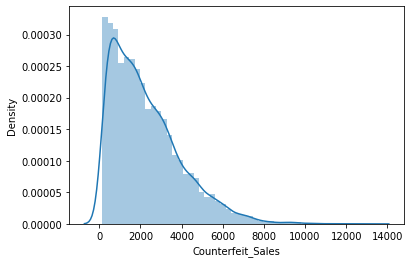

In [11]:
sns.distplot(train['Counterfeit_Sales'])

As we can see, the target column is highly affected by the outliers in our data.

Boxplot and Distplot confirms that the outliers has affected it causing the target variable to be right skewed.

We will deal with it later in the notebook.

Let's look how our data is distributed for rest of the data.

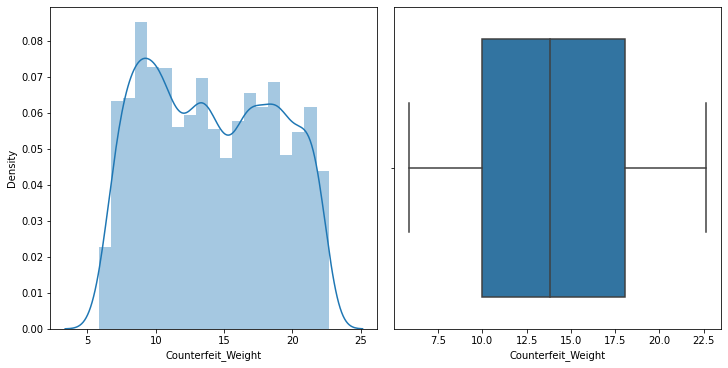

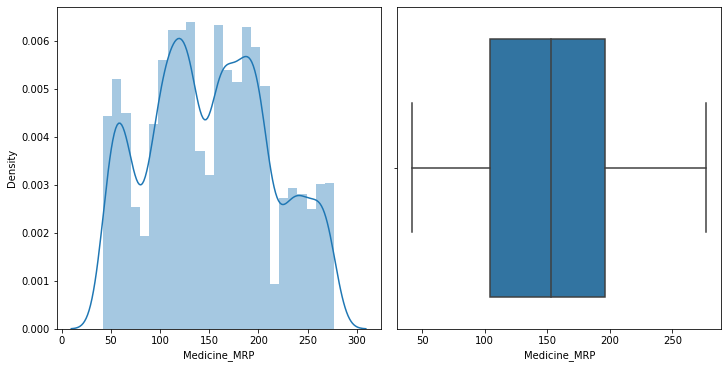

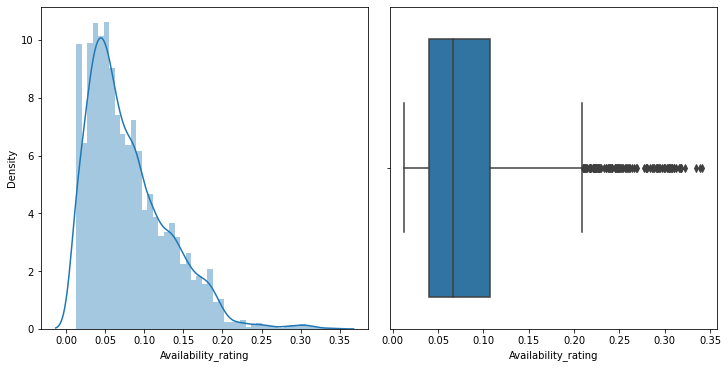

In [7]:
for i in num_dtype:
  if i == 'Active_Since':
    pass
  else:
    fig, axes = plt.subplots(1, 2, constrained_layout = True, figsize = (10,5))
    sns.distplot(train[i], ax = axes[0])
    sns.boxplot(train[i], ax = axes[1])
    plt.show()

Text(0.5, 0, 'Availability Rating')

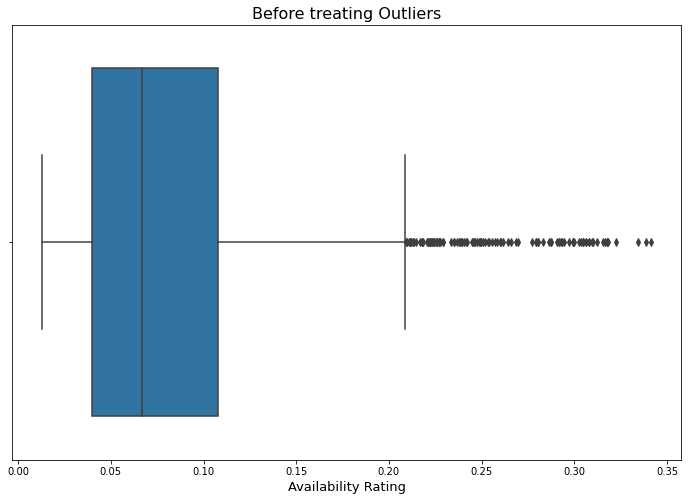

In [7]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Availability_rating', data = train)
plt.title('Before treating Outliers', fontsize = 16)
plt.xlabel('Availability Rating', fontsize = 13)

As we can see that 'Availability Rating' contains many outliers in our data.

We will treat it using IQR range treatment to reduce the outliers in our data.

In [58]:
Q1 = train['Availability_rating'].quantile(.25)
Q3 = train['Availability_rating'].quantile(.75)
IQR = Q3-Q1
low_range = Q1 - (1.5*IQR)
up_range = Q3 + (1.5*IQR)
print('Q1 : ', Q1)
print('Q3 : ', Q3)
print('IQR : ', IQR)
print('low_range : ', low_range)
print('up_range : ', up_range)

Q1 :  0.0400583655
Q3 :  0.107696525
IQR :  0.0676381595
low_range :  -0.06139887375
up_range :  0.20915376424999998


In [59]:
for i in range(train.shape[0]):
  if (train['Availability_rating'][i]>low_range and train['Availability_rating'][i]<up_range):
    pass
  else:
    train['Availability_rating'][i] = np.nan

train['Availability_rating'] = train['Availability_rating'].fillna(train['Availability_rating'].median())
train['Counterfeit_Weight'] = train['Counterfeit_Weight'].fillna(train['Counterfeit_Weight'].median())

Replacing the values not in IQR range with NaN and then with it's median value.

Text(0.5, 0, 'Availability Rating')

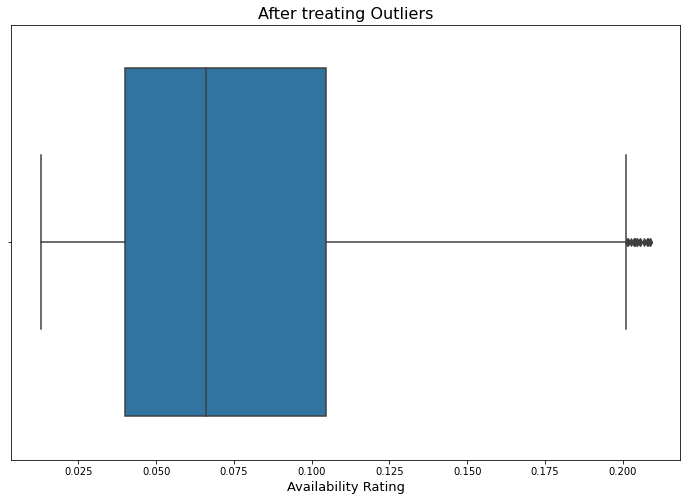

In [10]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Availability_rating', data = train)
plt.title('After treating Outliers', fontsize = 16)
plt.xlabel('Availability Rating', fontsize = 13)

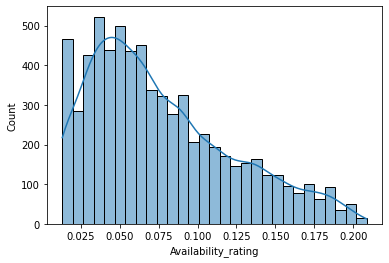

In [11]:
sns.histplot(x = 'Availability_rating', kde = True, data = train)

After treating outliers, the distribution of Availability_rating is still right skewed.

We will transform it into *Log transformation* to convert it into *Normal Distribution*

Although *$ActiveSince$* is labeled as numeric data type, but it will be treated as categorical data type.

In [11]:
for i in obj_dtype:
  print(f'{i} -> {train[i].nunique()}')

Medicine_ID -> 1557
DistArea_ID -> 10
Medicine_Type -> 16
SidEffect_Level -> 2
Area_Type -> 4
Area_City_Type -> 3
Area_dist_level -> 4


Trying to look into the categorical data, and finding any correlation among them using *'$Kendall~Rank~Correlation$'*

In [60]:
from scipy.stats import kendalltau
arr = []
for i in range(7):
  col = []
  for j in range(7):
    corr, p = kendalltau(train[obj_dtype[i]], train[obj_dtype[j]])
    col.append(corr)
  arr.append(col)
z = pd.DataFrame(arr)
z.columns = obj_dtype
z.index = obj_dtype
z

,Medicine_ID,DistArea_ID,Medicine_Type,SidEffect_Level,Area_Type,Area_City_Type,Area_dist_level
Medicine_ID,1.000000,0.006094,0.001752,0.018012,-0.002887,-0.004402,-0.004757
DistArea_ID,0.006094,1.000000,-0.001488,0.004778,-0.236708,-0.627149,0.028453
Medicine_Type,0.001752,-0.001488,1.000000,0.059834,-0.006014,-0.003706,0.002529
SidEffect_Level,0.018012,0.004778,0.059834,1.000000,0.000494,-0.007592,0.005315
Area_Type,-0.002887,-0.236708,-0.006014,0.000494,1.000000,-0.021389,0.181498
Area_City_Type,-0.004402,-0.627149,-0.003706,-0.007592,-0.021389,1.000000,-0.219663
Area_dist_level,-0.004757,0.028453,0.002529,0.005315,0.181498,-0.219663,1.000000


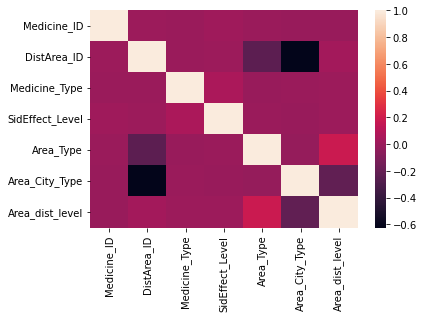

In [20]:
sns.heatmap(z)

From the *$Heatmap~Plot$*, we find that the categorical data in uncorrealted among themselves, and hence all play an important role in building a model.

* $MedicineID$,$~DistAreaID$, $~MedicineType$ and $ActiveSince$ columns will be treated as 
categorical data.
* Therefore we use Count/Frequency Encoding.

In [61]:
list_map = ['Medicine_ID', 'DistArea_ID', 'Medicine_Type', 'Active_Since']
for i in list_map:
  x = train[i].value_counts(normalize = True)
  train['Encoded_' + i] = train[i].map(x)
  train = train.drop(i, axis = 1)
train.head() 

,Counterfeit_Weight,Medicine_MRP,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,Encoded_Medicine_ID,Encoded_DistArea_ID,Encoded_Medicine_Type,Encoded_Active_Since
0,13.100,160.2366,critical,0.070422,DownTown,Tier 1,Small,1775.5026,0.000880,0.109856,0.049721,0.109856
1,13.800,110.4384,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520,0.001027,0.107803,0.075389,0.171018
2,9.025,259.4092,mild,0.060783,DownTown,Tier 1,Small,2603.0920,0.000733,0.109856,0.076562,0.109856
3,11.800,99.9830,mild,0.065555,DownTown,Tier 1,Small,1101.7130,0.000587,0.109856,0.101789,0.109856
4,13.800,56.4402,critical,0.066026,MidTownResidential,Tier 1,Small,158.9402,0.000880,0.063215,0.143150,0.171018


Now creating dummies for rest of the Categorical Columns.

In [62]:
dummy = ['SidEffect_Level', 'Area_Type', 'Area_City_Type', 'Area_dist_level']
for i in dummy:
  df = pd.get_dummies(train[i], drop_first = True, prefix = i)
  train = pd.concat([train, df], axis = 1)
  train = train.drop(i, axis = 1)
train.head()

,Counterfeit_Weight,Medicine_MRP,Availability_rating,Counterfeit_Sales,Encoded_Medicine_ID,Encoded_DistArea_ID,Encoded_Medicine_Type,Encoded_Active_Since,SidEffect_Level_mild,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,Area_City_Type_Tier 2,Area_City_Type_Tier 3,Area_dist_level_Medium,Area_dist_level_Small,Area_dist_level_Unknown
0,13.100,160.2366,0.070422,1775.5026,0.000880,0.109856,0.049721,0.109856,0,1,0,0,0,0,0,1,0
1,13.800,110.4384,0.013000,3069.1520,0.001027,0.107803,0.075389,0.171018,1,0,0,0,0,1,1,0,0
2,9.025,259.4092,0.060783,2603.0920,0.000733,0.109856,0.076562,0.109856,1,1,0,0,0,0,0,1,0
3,11.800,99.9830,0.065555,1101.7130,0.000587,0.109856,0.101789,0.109856,1,1,0,0,0,0,0,1,0
4,13.800,56.4402,0.066026,158.9402,0.000880,0.063215,0.143150,0.171018,0,0,0,1,0,0,0,1,0


$Availabillty~Rating$ and $Counterfeit~Sales$ are right skewed, now we have to deal with them by converting them using *$Log~Transformation$*

In [63]:
train['Availability_rating'] = np.log(train['Availability_rating'])
train['Counterfeit_Sales'] = np.log(train['Counterfeit_Sales'])

In [64]:
train.describe()

,Counterfeit_Weight,Medicine_MRP,Availability_rating,Counterfeit_Sales,Encoded_Medicine_ID,Encoded_DistArea_ID,Encoded_Medicine_Type,Encoded_Active_Since,SidEffect_Level_mild,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,Area_City_Type_Tier 2,Area_City_Type_Tier 3,Area_dist_level_Medium,Area_dist_level_Small,Area_dist_level_Unknown
count,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,14.061176,151.401518,-2.781611,7.412212,0.000722,0.103253,0.091529,0.116882,0.650337,0.657231,0.106923,0.128043,0.329129,0.389410,0.323115,0.282781,0.284248
std,4.235049,62.203961,0.683644,0.874915,0.000215,0.015089,0.040103,0.026903,0.476898,0.474670,0.309038,0.334163,0.469931,0.487652,0.467701,0.450384,0.451088
min,5.855000,41.790000,-4.342806,4.985591,0.000147,0.063215,0.007187,0.064828,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.600000,104.509400,-3.217418,6.838690,0.000587,0.107803,0.061602,0.107950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.800000,153.195700,-2.717701,7.551014,0.000733,0.108390,0.078615,0.109856,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.300000,196.148350,-2.258948,8.073290,0.000880,0.109856,0.142270,0.111470,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,22.650000,277.188400,-1.566756,9.487969,0.001320,0.111470,0.143150,0.171018,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


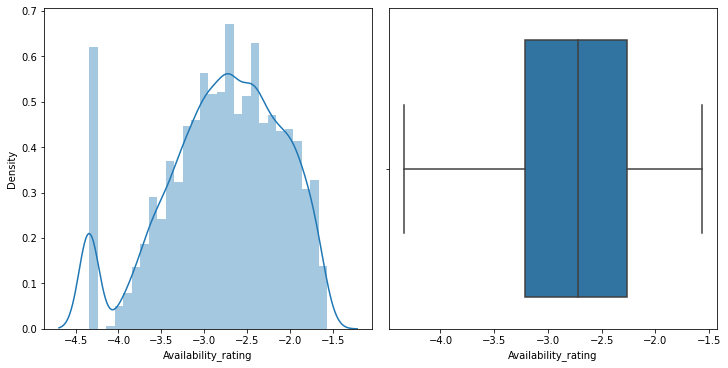

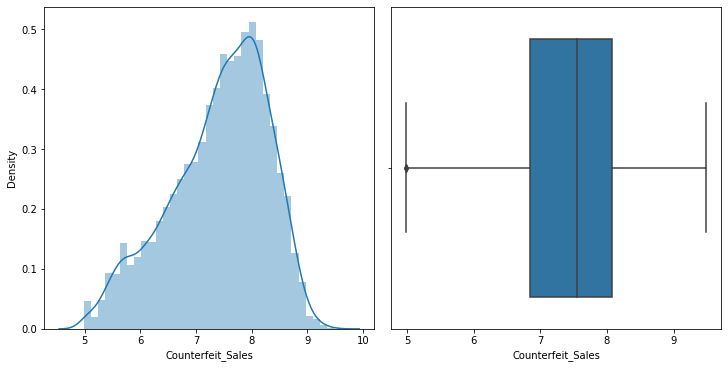

In [41]:
for i in ['Availability_rating', 'Counterfeit_Sales']:
  fig, axes = plt.subplots(1, 2, constrained_layout = True, figsize = (10,5))
  sns.distplot(train[i], ax = axes[0])
  sns.boxplot(train[i], ax = axes[1])

In [25]:
train.head()

,Counterfeit_Weight,Medicine_MRP,Availability_rating,Counterfeit_Sales,Encoded_Medicine_ID,Encoded_DistArea_ID,Encoded_Medicine_Type,Encoded_Active_Since,SidEffect_Level_mild,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,Area_City_Type_Tier 2,Area_City_Type_Tier 3,Area_dist_level_Medium,Area_dist_level_Small,Area_dist_level_Unknown
0,13.100,160.2366,-2.653256,7.481839,0.000880,0.109856,0.049721,0.109856,0,1,0,0,0,0,0,1,0
1,13.800,110.4384,-4.342806,8.029157,0.001027,0.107803,0.075389,0.171018,1,0,0,0,0,1,1,0,0
2,9.025,259.4092,-2.800446,7.864455,0.000733,0.109856,0.076562,0.109856,1,1,0,0,0,0,0,1,0
3,11.800,99.9830,-2.724861,7.004622,0.000587,0.109856,0.101789,0.109856,1,1,0,0,0,0,0,1,0
4,13.800,56.4402,-2.717701,5.068528,0.000880,0.063215,0.143150,0.171018,0,0,0,1,0,0,0,1,0


Before building model, first we use $StandardScaler$ to convert the numerical data to normal distribution.

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(train[['Medicine_MRP', 'Availability_rating', 'Counterfeit_Weight', 'Counterfeit_Sales']])
scaled_data = pd.DataFrame(scaled, columns = ['Medicine_MRP_scaled', 'Availability_rating_scaled', 'Counterfeit_Weight_scaled', 'Counterfeit_Sales_scaled'])
train = pd.concat([train, scaled_data], axis = 1)
train = train.drop(['Medicine_MRP', 'Availability_rating', 'Counterfeit_Weight', 'Counterfeit_Sales'], axis = 1)
train.head()

,Encoded_Medicine_ID,Encoded_DistArea_ID,Encoded_Medicine_Type,Encoded_Active_Since,SidEffect_Level_mild,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,Area_City_Type_Tier 2,Area_City_Type_Tier 3,Area_dist_level_Medium,Area_dist_level_Small,Area_dist_level_Unknown,Medicine_MRP_scaled,Availability_rating_scaled,Counterfeit_Weight_scaled,Counterfeit_Sales_scaled
0,0.000880,0.109856,0.049721,0.109856,0,1,0,0,0,0,0,1,0,0.142044,0.187766,-0.226974,0.079588
1,0.001027,0.107803,0.075389,0.171018,1,0,0,0,0,1,1,0,0,-0.658577,-2.283806,-0.061675,0.705201
2,0.000733,0.109856,0.076562,0.109856,1,1,0,0,0,0,0,1,0,1.736475,-0.027553,-1.189253,0.516938
3,0.000587,0.109856,0.101789,0.109856,1,1,0,0,0,0,0,1,0,-0.826672,0.083018,-0.533959,-0.465897
4,0.000880,0.063215,0.143150,0.171018,0,0,0,1,0,0,0,1,0,-1.526724,0.093492,-0.061675,-2.678953


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Encoded_Medicine_ID           6818 non-null   float64
 1   Encoded_DistArea_ID           6818 non-null   float64
 2   Encoded_Medicine_Type         6818 non-null   float64
 3   Encoded_Active_Since          6818 non-null   float64
 4   SidEffect_Level_mild          6818 non-null   uint8  
 5   Area_Type_DownTown            6818 non-null   uint8  
 6   Area_Type_Industrial          6818 non-null   uint8  
 7   Area_Type_MidTownResidential  6818 non-null   uint8  
 8   Area_City_Type_Tier 2         6818 non-null   uint8  
 9   Area_City_Type_Tier 3         6818 non-null   uint8  
 10  Area_dist_level_Medium        6818 non-null   uint8  
 11  Area_dist_level_Small         6818 non-null   uint8  
 12  Area_dist_level_Unknown       6818 non-null   uint8  
 13  Med

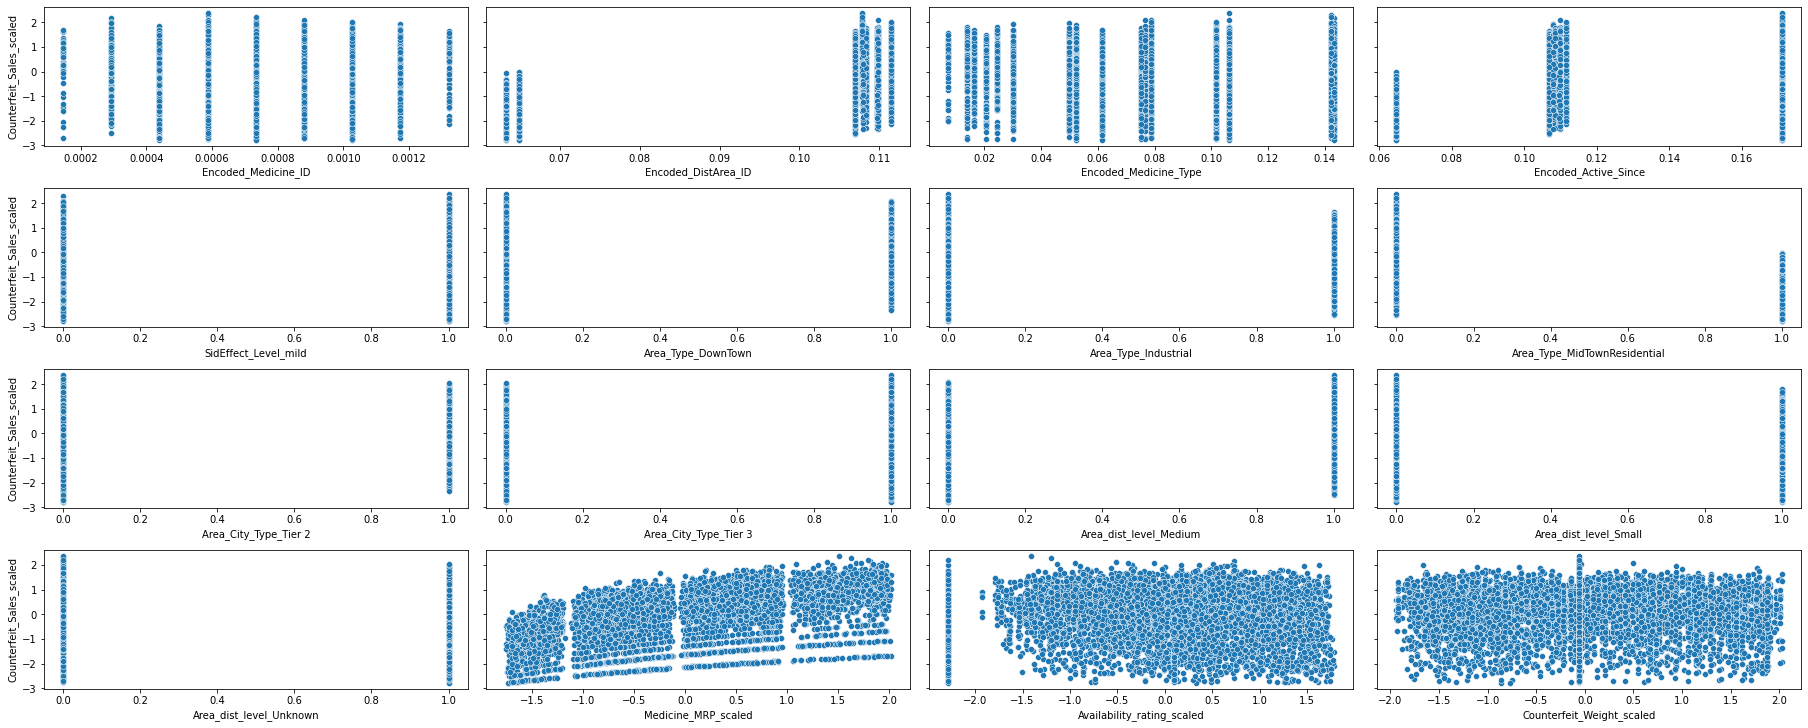

In [18]:
fig, axes = plt.subplots(4,4, sharey = True, figsize = (25,10), constrained_layout = True)
sns.scatterplot(y = train['Counterfeit_Sales_scaled'], x = train[train.columns[0]], ax = axes[0,0])
sns.scatterplot(y = train['Counterfeit_Sales_scaled'], x = train[train.columns[1]], ax = axes[0,1])
sns.scatterplot(y = train['Counterfeit_Sales_scaled'], x = train[train.columns[2]], ax = axes[0,2])
sns.scatterplot(y = train['Counterfeit_Sales_scaled'], x = train[train.columns[3]], ax = axes[0,3])
sns.scatterplot(y = train['Counterfeit_Sales_scaled'], x = train[train.columns[4]], ax = axes[1,0])
sns.scatterplot(y = train['Counterfeit_Sales_scaled'], x = train[train.columns[5]], ax = axes[1,1])
sns.scatterplot(y = train['Counterfeit_Sales_scaled'], x = train[train.columns[6]], ax = axes[1,2])
sns.scatterplot(y = train['Counterfeit_Sales_scaled'], x = train[train.columns[7]], ax = axes[1,3])
sns.scatterplot(y = train['Counterfeit_Sales_scaled'], x = train[train.columns[8]], ax = axes[2,0])
sns.scatterplot(y = train['Counterfeit_Sales_scaled'], x = train[train.columns[9]], ax = axes[2,1])
sns.scatterplot(y = train['Counterfeit_Sales_scaled'], x = train[train.columns[10]], ax = axes[2,2])
sns.scatterplot(y = train['Counterfeit_Sales_scaled'], x = train[train.columns[11]], ax = axes[2,3])
sns.scatterplot(y = train['Counterfeit_Sales_scaled'], x = train[train.columns[12]], ax = axes[3,0])
sns.scatterplot(y = train['Counterfeit_Sales_scaled'], x = train[train.columns[13]], ax = axes[3,1])
sns.scatterplot(y = train['Counterfeit_Sales_scaled'], x = train[train.columns[14]], ax = axes[3,2])
sns.scatterplot(y = train['Counterfeit_Sales_scaled'], x = train[train.columns[15]], ax = axes[3,3])

plt.show()

Seeing the scatterplot of the dataset w.r.t Counterfeit_Sales_scaled(target variable) we are able to judge that using the regression algorithm to it, will lead to poor results.

Hence, we can use Decision Tree, Random Forest(Bagging) and Boosting Techniques to generate good results.

Now applying all the EDA, Data Processing and Data Visualizations methods we have applied to the train dataset, we will use it in test dataset.

In [48]:
print("No. of rows in the dataset:",test.shape[0])
print("No. of columns in the dataset:",test.shape[1])

No. of rows in the dataset: 1705
No. of columns in the dataset: 11


In [49]:
test.isnull().sum()

Medicine_ID              0
Counterfeit_Weight     297
DistArea_ID              0
Active_Since             0
Medicine_MRP             0
Medicine_Type            0
SidEffect_Level          0
Availability_rating      0
Area_Type                0
Area_City_Type           0
Area_dist_level          0
dtype: int64

In [19]:
obj_dtype_ = [i for i in test if test[i].dtypes == 'O']
num_dtype_ = [i for i in test if test[i].dtypes != 'O']
print(obj_dtype_)
print(num_dtype_)

['Medicine_ID', 'DistArea_ID', 'Medicine_Type', 'SidEffect_Level', 'Area_Type', 'Area_City_Type', 'Area_dist_level']
['Counterfeit_Weight', 'Active_Since', 'Medicine_MRP', 'Availability_rating']


Text(0.5, 0, 'Availability Rating')

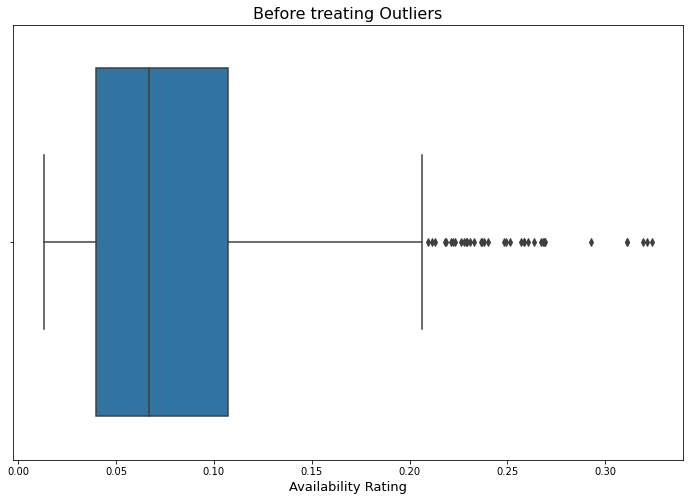

In [54]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Availability_rating', data = test)
plt.title('Before treating Outliers', fontsize = 16)
plt.xlabel('Availability Rating', fontsize = 13)

In [66]:
Q1_ = test['Availability_rating'].quantile(.25)
Q3_ = test['Availability_rating'].quantile(.75)
IQR_ = Q3_- Q1_
low_range_ = Q1_ - (1.5*IQR_)
up_range_ = Q3_ + (1.5*IQR_)
print('Q1 : ', Q1_)
print('Q3 : ', Q3_)
print('IQR : ', IQR_)
print('low_range : ', low_range_)
print('up_range : ', up_range_)

Q1 :  0.039830586
Q3 :  0.107219593
IQR :  0.067389007
low_range :  -0.0612529245
up_range :  0.2083031035


In [67]:
for i in range(test.shape[0]):
  if (test['Availability_rating'][i]>low_range_ and test['Availability_rating'][i]<up_range_):
    pass
  else:
    test['Availability_rating'][i] = np.nan

test['Availability_rating'] = test['Availability_rating'].fillna(test['Availability_rating'].median())
test['Counterfeit_Weight'] = test['Counterfeit_Weight'].fillna(test['Counterfeit_Weight'].median())

Text(0.5, 0, 'Availability Rating')

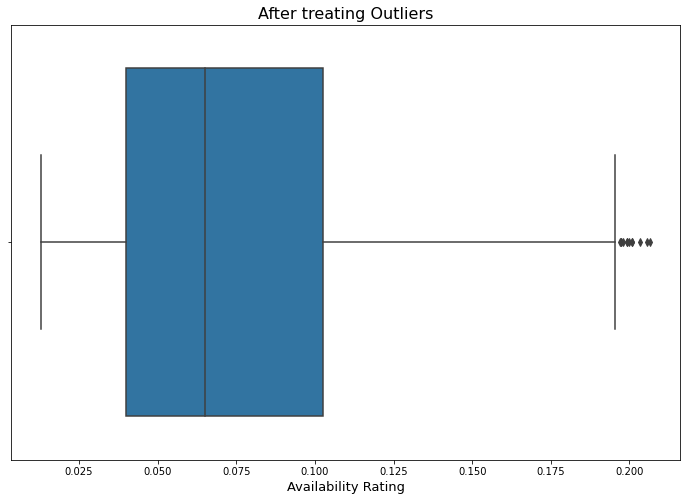

In [68]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Availability_rating', data = test)
plt.title('After treating Outliers', fontsize = 16)
plt.xlabel('Availability Rating', fontsize = 13)

In [59]:
for i in obj_dtype:
  print(f'{i} -> {test[i].nunique()}')

Medicine_ID -> 1049
DistArea_ID -> 10
Medicine_Type -> 16
SidEffect_Level -> 2
Area_Type -> 4
Area_City_Type -> 3
Area_dist_level -> 4


In [69]:
from scipy.stats import kendalltau
arr = []
for i in range(7):
  col = []
  for j in range(7):
    corr, p = kendalltau(test[obj_dtype[i]], test[obj_dtype[j]])
    col.append(corr)
  arr.append(col)
z = pd.DataFrame(arr)
z.columns = obj_dtype_
z.index = obj_dtype_
z

,Medicine_ID,DistArea_ID,Medicine_Type,SidEffect_Level,Area_Type,Area_City_Type,Area_dist_level
Medicine_ID,1.000000,0.017529,-0.014696,-0.003058,0.000104,-0.013751,0.005876
DistArea_ID,0.017529,1.000000,-0.001304,-0.022667,-0.243394,-0.637915,0.051553
Medicine_Type,-0.014696,-0.001304,1.000000,0.069912,0.036881,-0.007494,-0.000444
SidEffect_Level,-0.003058,-0.022667,0.069912,1.000000,0.002644,0.037388,-0.015095
Area_Type,0.000104,-0.243394,0.036881,0.002644,1.000000,-0.007677,0.185902
Area_City_Type,-0.013751,-0.637915,-0.007494,0.037388,-0.007677,1.000000,-0.235011
Area_dist_level,0.005876,0.051553,-0.000444,-0.015095,0.185902,-0.235011,1.000000


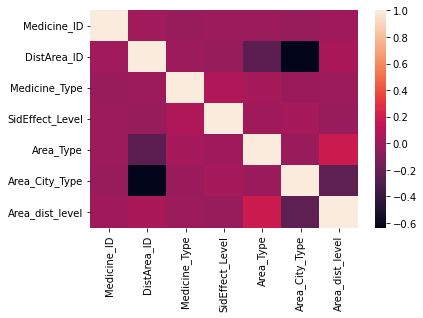

In [40]:
sns.heatmap(z)

In [70]:
list_map = ['Medicine_ID', 'DistArea_ID', 'Medicine_Type', 'Active_Since']
for i in list_map:
  x = test[i].value_counts(normalize = True)
  test['Encoded_' + i] = test[i].map(x)
  test = test.drop(i, axis = 1)
test.head() 

,Counterfeit_Weight,Medicine_MRP,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Encoded_Medicine_ID,Encoded_DistArea_ID,Encoded_Medicine_Type,Encoded_Active_Since
0,14.30,85.5328,mild,0.112747,CityLimits,Tier 3,Medium,0.001173,0.117302,0.153666,0.174194
1,13.45,257.1460,mild,0.144446,DownTown,Tier 2,Unknown,0.000587,0.113196,0.095015,0.113196
2,7.10,98.1172,mild,0.144221,DownTown,Tier 2,Unknown,0.001760,0.113196,0.085630,0.113196
3,18.30,135.3730,mild,0.100388,MidTownResidential,Tier 3,Unknown,0.000587,0.066276,0.058651,0.066276
4,14.30,112.8016,mild,0.022585,MidTownResidential,Tier 1,Small,0.001173,0.056891,0.095015,0.174194


In [71]:
dummy = ['SidEffect_Level', 'Area_Type', 'Area_City_Type', 'Area_dist_level']
for i in dummy:
  df = pd.get_dummies(test[i], drop_first = True, prefix = i)
  test = pd.concat([test, df], axis = 1)
  test = test.drop(i, axis = 1)
test.head()

,Counterfeit_Weight,Medicine_MRP,Availability_rating,Encoded_Medicine_ID,Encoded_DistArea_ID,Encoded_Medicine_Type,Encoded_Active_Since,SidEffect_Level_mild,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,Area_City_Type_Tier 2,Area_City_Type_Tier 3,Area_dist_level_Medium,Area_dist_level_Small,Area_dist_level_Unknown
0,14.30,85.5328,0.112747,0.001173,0.117302,0.153666,0.174194,1,0,0,0,0,1,1,0,0
1,13.45,257.1460,0.144446,0.000587,0.113196,0.095015,0.113196,1,1,0,0,1,0,0,0,1
2,7.10,98.1172,0.144221,0.001760,0.113196,0.085630,0.113196,1,1,0,0,1,0,0,0,1
3,18.30,135.3730,0.100388,0.000587,0.066276,0.058651,0.066276,1,0,0,1,0,1,0,0,1
4,14.30,112.8016,0.022585,0.001173,0.056891,0.095015,0.174194,1,0,0,1,0,0,0,1,0


In [72]:
test['Availability_rating'] = np.log(test['Availability_rating'])

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(test[['Medicine_MRP', 'Availability_rating', 'Counterfeit_Weight']])
scaled_data = pd.DataFrame(scaled, columns = ['Medicine_MRP_scaled', 'Availability_rating_scaled', 'Counterfeit_Weight_scaled'])
test = pd.concat([test, scaled_data], axis = 1)
test = test.drop(['Medicine_MRP', 'Availability_rating', 'Counterfeit_Weight'], axis = 1)
test.head()

,Encoded_Medicine_ID,Encoded_DistArea_ID,Encoded_Medicine_Type,Encoded_Active_Since,SidEffect_Level_mild,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,Area_City_Type_Tier 2,Area_City_Type_Tier 3,Area_dist_level_Medium,Area_dist_level_Small,Area_dist_level_Unknown,Medicine_MRP_scaled,Availability_rating_scaled,Counterfeit_Weight_scaled
0,0.001173,0.117302,0.153666,0.174194,1,0,0,0,0,1,1,0,0,-1.044256,0.898355,-0.005633
1,0.000587,0.113196,0.095015,0.113196,1,1,0,0,1,0,0,0,1,1.699068,1.261577,-0.208334
2,0.001760,0.113196,0.085630,0.113196,1,1,0,0,1,0,0,0,1,-0.843088,1.259297,-1.722625
3,0.000587,0.066276,0.058651,0.066276,1,0,0,1,0,1,0,0,1,-0.247535,0.728129,0.948251
4,0.001173,0.056891,0.095015,0.174194,1,0,0,1,0,0,0,1,0,-0.608350,-1.458857,-0.005633


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [75]:
X = train.drop(['Counterfeit_Sales_scaled'], axis = 1)
y = train['Counterfeit_Sales_scaled']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .25, random_state = 101)

X_train.shape

(5113, 16)

## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeRegressor

params_grid = {'min_samples_leaf':[1,3,5,7,9,10,12,13,15],
               'min_samples_split':[1,2,3,5,7,10,15,20],
               'max_depth':[1,2,3,4,5,6,7,8,9,10]}

gd_model = GridSearchCV(DecisionTreeRegressor(),param_grid=params_grid,scoring = 'neg_mean_absolute_error',cv = 10) 
gd_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 10, 12, 13, 15],
                         'min_samples_split': [1, 2, 3, 5, 7, 10, 15, 20]},
             scoring='neg_mean_absolute_error')

In [23]:
gd_model.best_params_

{'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 2}

In [24]:
gd_model.best_score_

-0.414714120010146

In [25]:
dt_final = DecisionTreeRegressor(max_depth = 5,min_samples_leaf = 15, min_samples_split = 2)
dt_final.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=15)

In [69]:
y_val_pred = dt_final.predict(X_val)
mean_absolute_error(y_val, y_val_pred)

0.41121617792984416

In [70]:
y_test_tree_pred = dt_final.predict(test)
y_test_tree_pred

array([ 0.33446392,  0.87261516, -0.14590585, ...,  0.58527464,
        0.87261516,  0.87261516])

In [27]:
from sklearn.tree import export_graphviz
import pydotplus,graphviz
from six import StringIO
from IPython.display import Image

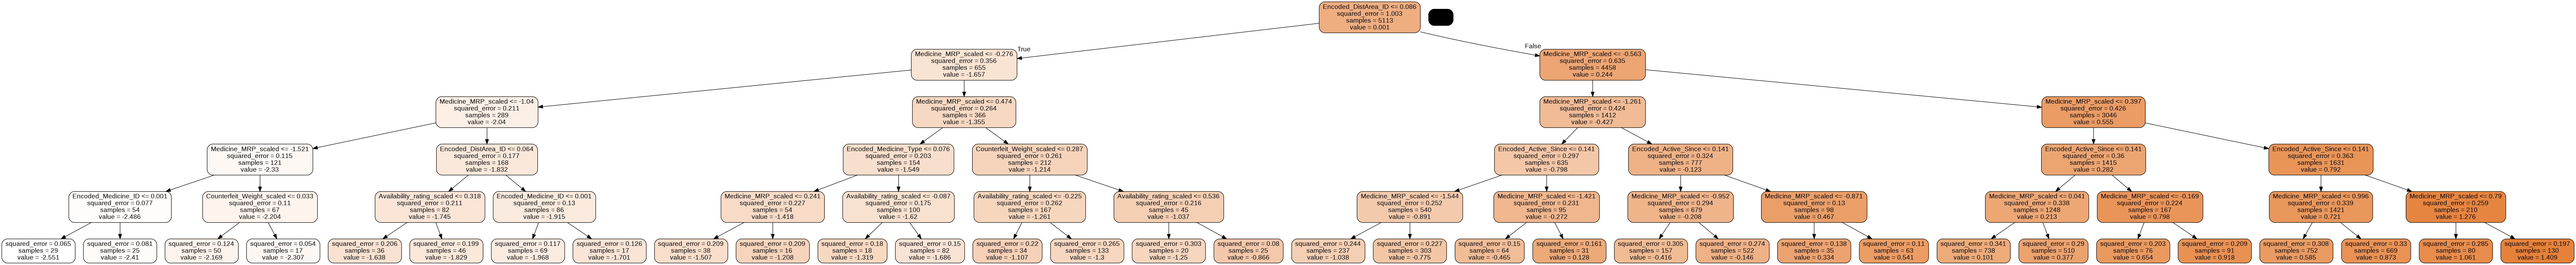

In [28]:
dot_data = StringIO()
export_graphviz(dt_final,out_file=dot_data,filled = True,rounded = True,feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Random Forest

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
param_grid = {'n_estimators':[1,2,5,10,12,15,18,20,25,30,40,50,75]}
gd_model = GridSearchCV(rf_model,param_grid=param_grid,scoring = 'neg_mean_absolute_error',cv = 10)
gd_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [1, 2, 5, 10, 12, 15, 18, 20, 25, 30,
                                          40, 50, 75]},
             scoring='neg_mean_absolute_error')

In [76]:
gd_model.best_estimator_

RandomForestRegressor(n_estimators=50)

In [77]:
gd_model.best_params_

{'n_estimators': 50}

In [78]:
gd_model.best_score_

-0.4316040753506744

In [82]:
final_rf_model = RandomForestRegressor(n_estimators = 50, min_samples_split=2, min_samples_leaf=1)
final_rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [83]:
y_val_random_pred = final_rf_model.predict(X_val)

In [84]:
mean_absolute_error(y_val, y_val_random_pred)

0.4368368612641867

## XGBoost

In [76]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [77]:
xgb_model = XGBRegressor()
params = {#when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.01, .011, .02, .03, 0.05, .07], #so called `eta` value
              'max_depth': [2, 3, 4, 5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [400, 410, 420, 430, 440, 450, 500]}

In [78]:
xgb_grid_model = GridSearchCV(xgb_model,param_grid = params,cv = 5, scoring = 'neg_mean_absolute_error')
xgb_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.01, 0.011, 0.02, 0.03, 0.05, 0.07],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_child_weight': [4],
                         'n_estimators': [400, 410, 420, 430, 440, 450, 500],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             scoring='neg_mean_absolute_error')

In [79]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 2,
 'min_child_weight': 4,
 'n_estimators': 430,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

In [80]:
xgb_grid_model.best_score_

-0.40775969611269697

In [81]:
final_xgb_model = XGBRegressor(colsample_bytree = .7, learning_rate = .03, max_depth = 2, 
                               min_child_weight = 4, n_estimators = 430, objective = 'reg:linear',
                               silent = 1, subsample = .7)
final_xgb_model.fit(X_train, y_train)

XGBRegressor(colsample_bytree=0.7, learning_rate=0.03, max_depth=2,
             min_child_weight=4, n_estimators=430, silent=1, subsample=0.7)

In [82]:
y_val_xgb_model = final_xgb_model.predict(X_val)
mean_absolute_error(y_val, y_val_xgb_model)

0.4068652250962593

In [83]:
y_test_xgb_pred = final_xgb_model.predict(test)
y_test_xgb_pred

array([ 0.035211  ,  0.93097806, -0.11044472, ...,  0.42894375,
        1.0201507 ,  0.90420187], dtype=float32)

In [87]:
mean = 7.412212
std = 0.874915
med = 7.551014

In [91]:
df = pd.DataFrame(test_name)
df['Counterfeit_Sales'] = (y_test_xgb_pred*std)+mean
df['Counterfeit_Sales'] = np.exp(df['Counterfeit_Sales'])
df

,Medicine_ID,Counterfeit_Sales
0,HLZ81,1707.897705
1,ECE94,3739.618408
2,SAD14,1503.546997
3,EQV63,402.927795
4,AIR10,385.675385
...,...,...
1700,KXW10,2562.260498
1701,CKE54,646.576599
1702,HAY13,2410.287598
1703,ZEE32,4043.060059


In [92]:
df.to_csv('Rajat_Bisht_part2.csv', header = True, index = False)